In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
df['temp'] = df['species'].map(species_to_num)

In [7]:
y= df['temp']

In [10]:
col = ['petal_length','petal_width']
X= df.loc[:,col]

In [11]:
C= 0.001
clf = svm.SVC(kernel='linear',C=C)

In [12]:
clf.fit(X,y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
clf.predict([[1.4,0.2]])

array([0])

In [32]:
#Plotting the predictions
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = y.min(), y.max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max, h))

In [33]:
y_min

0

In [34]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [35]:
z = z.reshape(xx.shape)

In [38]:
fig = plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

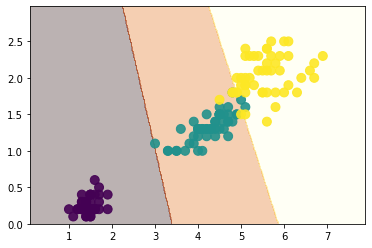

In [50]:
plt.contourf(xx,yy,z, cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha = 0.9)

In [51]:
#We can perform the same steps on train and test data
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

In [56]:
#scaling features
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [59]:
C= 1
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [62]:
res = cross_val_score(clf,X_std_train, y_train, cv=10, scoring='accuracy')

In [63]:
np.mean(res)

0.9501398601398602

In [64]:
y_train_pred = cross_val_predict(clf,X_std_train, y_train, cv = 3)

In [65]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [69]:
precision_score(y_train, y_train_pred, average='weighted')

0.95

In [70]:
recall_score(y_train, y_train_pred, average='weighted')

0.95

In [71]:
f1_score(y_train, y_train_pred, average='weighted')

0.95

In [73]:
X_std_test = sc_x.fit_transform(X_test)
y_test_pred = cross_val_predict(clf, X_std_test, y_test, cv=3)

In [74]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [75]:
precision_score(y_test, y_test_pred, average='weighted')

0.9422222222222222

In [76]:
recall_score(y_test, y_test_pred, average='weighted')

0.9333333333333333

In [77]:
f1_score(y_test, y_test_pred, average='weighted')

0.929047619047619

In [83]:
#Using polynomial kernel with SVM
c = 1
clf_poly = svm.SVC(kernel='poly', degree = 10, C=c, gamma = 'auto')

In [92]:
clf_poly.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
z_poly = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])

In [94]:
z_poly = z_poly.reshape(xx.shape)

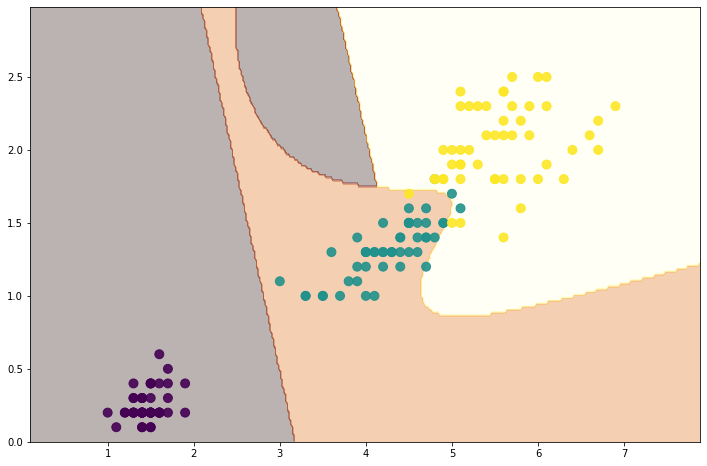

In [95]:
fig = plt.figure(figsize=(12,8))
plt.contourf(xx,yy,z_poly, cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=80, alpha = 0.9)

In [96]:
#classifier for training on training data
clf_poly_train = svm.SVC(kernel='poly', degree = 10, C=c, gamma = 'auto')
clf_poly_train.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
cross_val = cross_val_score(clf_poly_train, X_std_train, y_train, cv=10, scoring='accuracy')
np.mean(cross_val)
#accuracy has not increased with using polynomial SVM, we can tune the parameters of this algo to get better results

0.7864335664335665

In [130]:
c2 = 1
clf_poly_train2 = svm.SVC(kernel='poly', degree = 3, C=c2, gamma = 'auto')
clf_poly_train2.fit(X_std_train, y_train)
cross_val = cross_val_score(clf_poly_train2, X_std_train, y_train, cv=10, scoring='accuracy')
np.mean(cross_val)
#degree 3 performs bettter here

0.9524475524475525

In [131]:
y_test_pred_clf2 = cross_val_predict(clf_poly_train2, X_std_test, y_test, cv=3)
confusion_matrix(y_test, y_test_pred_clf2)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]])

In [132]:
precision_score(y_test, y_test_pred_clf2, average='weighted')

0.91875

In [133]:
recall_score(y_test, y_test_pred_clf2, average='weighted')

0.9

In [134]:
f1_score(y_test, y_test_pred_clf2, average='weighted')

0.8885057471264368

In [172]:
# using the radial bias function 
c=1
clf_poly_train_rbf = svm.SVC(kernel='rbf', C=c, gamma = 0.7)
clf_poly_train_rbf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [173]:
cross_val = cross_val_score(clf_poly_train_rbf, X_std_train, y_train, cv=3, scoring='accuracy')
np.mean(cross_val)

0.9585157390035439

In [174]:
y_train_pred_rbf = cross_val_predict(clf_poly_train_rbf, X_std_train,y_train, cv=3)
precision_score(y_train, y_train_pred_rbf, average='weighted')

0.9586036311709506

In [175]:
recall_score(y_train, y_train_pred_rbf, average='weighted')

0.9583333333333334

In [176]:
f1_score(y_train, y_train_pred_rbf, average='weighted')

0.9583716475095786

In [177]:
y_test_pred_rbf = cross_val_predict(clf_poly_train_rbf, X_std_test, y_test, cv=3)
confusion_matrix(y_test, y_test_pred_rbf)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [178]:
precision_score(y_test, y_test_pred_rbf, average='weighted')

0.9422222222222222

In [179]:
recall_score(y_test, y_test_pred_rbf, average='weighted')

0.9333333333333333

In [180]:
f1_score(y_test, y_test_pred_rbf, average='weighted')

0.929047619047619

In [181]:
# We can use Grid search cv to tune parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [182]:
pipeline = Pipeline([('clf',svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [195]:
params= {'clf__C':(0.1, 0.5, 1, 2, 5 ,10 ,20),
         'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [196]:
svd_grid_rbf = GridSearchCV(pipeline, params, n_jobs = -1, cv=3, verbose=1, scoring='accuracy')

In [197]:
svd_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    3.6s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy'

In [198]:
svd_grid_rbf.best_score_

0.9583333333333334

In [199]:
best = svd_grid_rbf.best_estimator_.get_params()

In [201]:
for k in sorted(params.keys()):
    print(k, best[k])

clf__C 0.1
clf__gamma 0.25


In [215]:
y_test_pred_rbf = svd_grid_rbf.predict(X_test)
confusion_matrix(y_test, y_test_pred_rbf)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [216]:
precision_score(y_test, y_test_pred_rbf, average='weighted')

1.0

In [217]:
recall_score(y_test, y_test_pred_rbf, average='weighted')

1.0

In [218]:
f1_score(y_test, y_test_pred_rbf, average='weighted')

1.0